# Bank Churners Prediction


In this notebook, we're going through a machine learning project with the goal of predicting customer churns.

## 1. Problem definition

A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction

## 2.Data

The data is downloaded from the [Kaggle Credit Card Approval dataset](https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers).
The database contains more than 10000 customers mentioning their age, salary, marital_status, credit card limit, credit card category, etc. There are 16 features in total.


## 3. Goal

> If we can reach 95% accuracy at predicting whether or not a customer churns during the proof of concept, we'll pursure this project.



## 4. Features

### Bank Churners database

1. CLIENTNUM - Client number. Unique identifier for the customer holding the account
2. Attrition_Flag - Internal event (customer activity) variable - if the account is closed then 1 else 0
3. Customer_Age - Demographic variable - Customer's Age in Years
4. Gender - Demographic variable - M=Male, F=Female
5. Dependent_count - Demographic variable - Number of dependents
6. Education_Level - Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)
7. Marital_Status - Demographic variable - Married, Single, Divorced, Unknown
8. Income_Category - Demographic variable - Annual Income Category of the account holder (< \$40K, \$40K - 60K, \$60K - \$80K, \$80K-\$120K, > \$120K, Unknown)
9. Card_Category - Product Variable - Type of Card (Blue, Silver, Gold, Platinum)
10. Months_on_book - Period of relationship with bank
11. Total_Relationship_Count - Total no. of products held by the customer
12. Months_Inactive_12_mon - No. of months inactive in the last 12 months
13. Contacts_Count_12_mon - No. of Contacts in the last 12 months
14. Credit_Limit - Credit Limit on the Credit Card
15. Total_Revolving_Bal - Total Revolving Balance on the Credit Card
16. Avg_Open_To_Buy - Open to Buy Credit Line (Average of last 12 months)
17. Total_Amt_Chng_Q4_Q1 - Change in Transaction Amount (Q4 over Q1)
18. Total_Trans_Amt - Total Transaction Amount (Last 12 months)
19. Total_Trans_Ct - Total Transaction Count (Last 12 months)
20. Total_Ct_Chng_Q4_Q1 - Change in Transaction Count (Q4 over Q1)
21. Avg_Utilization_Ratio - Average Card Utilization Ratio


### Preparing the tools

The major libraries we'll use:
* pandas for data analysis.
* NumPy for numerical operations.
* Matplotlib/seaborn for plotting or data visualization.
* Scikit-Learn for machine learning modelling and evaluation.
* XGBoost for machine learning modelling


In [1]:
# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to appear in the notebook
%matplotlib inline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
import xgboost as xgb


# Model evaluators
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

# Print last updated
import time
print(f"Last updated: {time.asctime()}")



Last updated: Sun Jan 28 12:47:21 2024


### Load the Data

In [2]:
# Import BankChurners.csv
df=pd.read_csv("/content/drive/MyDrive/credit_card_customers/BankChurners.csv")
df.drop(["CLIENTNUM","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"], axis=1, inplace=True)

We also make lists to distinguish different type of variables.

In [3]:
#First we take a look at the numerical variablies
cont_var=['Customer_Age','Months_on_book','Total_Revolving_Bal',
          'Total_Trans_Amt','Credit_Limit',
          'Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Ct_Chng_Q4_Q1',
          'Avg_Utilization_Ratio']
disc_var=['Dependent_count','Total_Relationship_Count','Months_Inactive_12_mon',
          'Contacts_Count_12_mon','Total_Trans_Ct']
num_var=cont_var+disc_var
# And now we collect the categorical variables
cat_var=[]
for label, content in df.items():
    if  not pd.api.types.is_numeric_dtype(content):
        cat_var.append(label)

### Data Exploration (exploratory data analysis or EDA)

In [4]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [5]:
# Let's see how many positive and negative samples we have in our dataframe
df.Attrition_Flag.value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

Since these two values are not close at all, our Attrition_Flag column should be considered unbalanced.

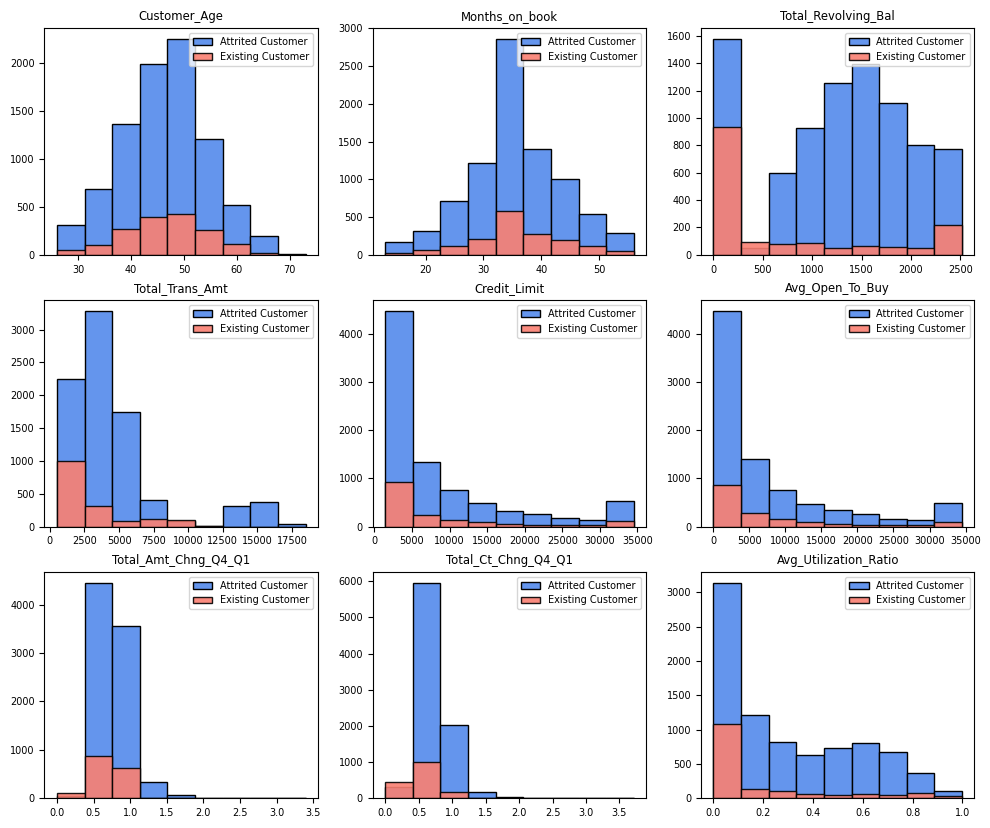

In [6]:
plt.figure(figsize=(12,10))
labels=["Attrited Customer","Existing Customer"]

for i, var in enumerate(cont_var):
# Create subplots
  plt.rcParams.update({'font.size': 7})
  ax=plt.subplot(3,3,i+1)

  plt.hist(df[df.Attrition_Flag=="Existing Customer"][var],
           bins=np.linspace(min(df[var]),max(df[var]), 10),
           label="Attrition", color="cornflowerblue",
           alpha=1,edgecolor='black')
  plt.hist(df[df.Attrition_Flag=="Attrited Customer"][var],
           bins=np.linspace(min(df[var]),max(df[var]), 10),
           label="Attrition", color="salmon",
           alpha=0.9,edgecolor='black')

  plt.legend(labels)
  plt.title(var)

Looking at the histograms above, we can collect some valuable information:
* A low revolving balance and a significant change in either the amount or transaction counts can be good indicator of customer attrition.
* In the previous trend, a really high revolving balance is an outlier because among those customers, the attrition rate is high.
* The older the customer, the less likely he/she will churn.

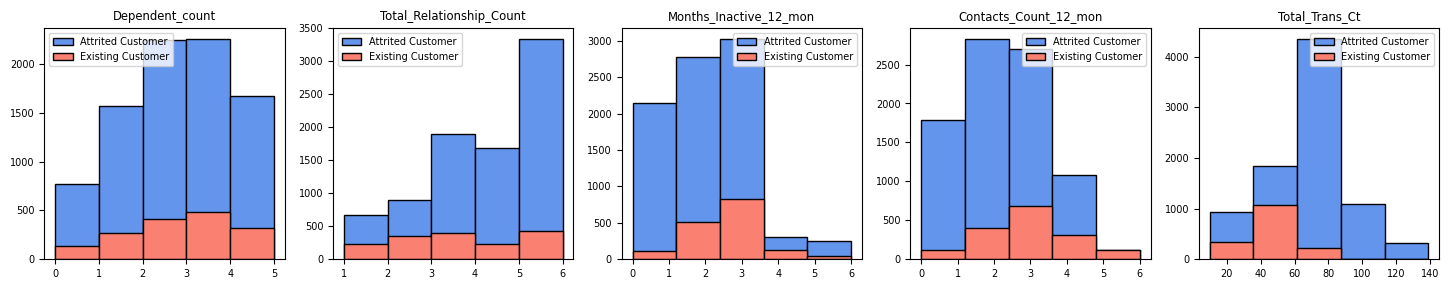

In [7]:
plt.figure(figsize=(18,3))

for i, var in enumerate(disc_var):
  ax=plt.subplot(1,5,i+1)
  plt.rcParams.update({'font.size': 7})
  plt.hist(df[df.Attrition_Flag=="Existing Customer"][var],
           bins=np.linspace(min(df[var]),max(df[var]), 6),
           label="Attrition", color="cornflowerblue",
           alpha=1,edgecolor='black')
  plt.hist(df[df.Attrition_Flag=="Attrited Customer"][var],
           bins=np.linspace(min(df[var]),max(df[var]), 6),
           label="Attrition", color="salmon",
           alpha=1,edgecolor='black')

  plt.title(var)
  plt.legend(labels)

Here we can see that in our discrete variables the distribution of the churned customers are quite balanced except the Total_Trans_Ct and the Total_Relationship_Count. A lower Total_Trans_Ct or Total_Relationship_Count indicates a higher chances of customer attrition.

In [8]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


<Figure size 1000x600 with 0 Axes>

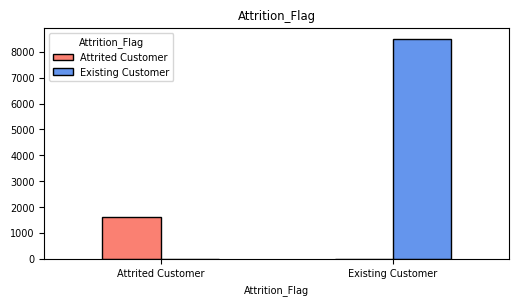

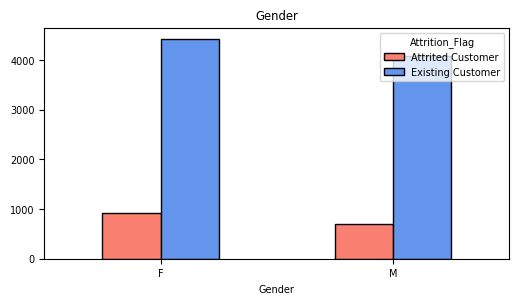

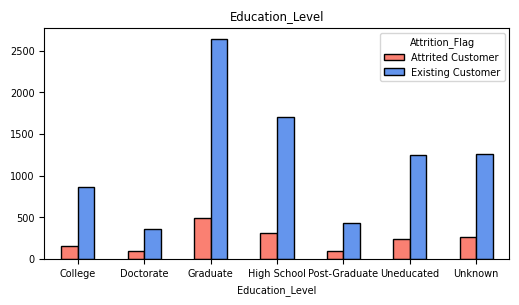

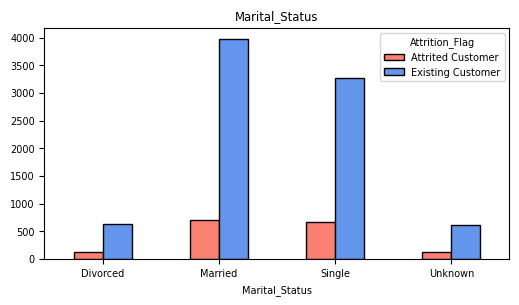

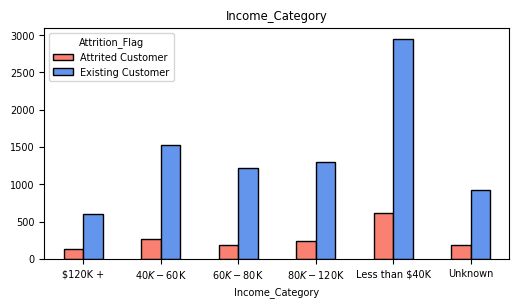

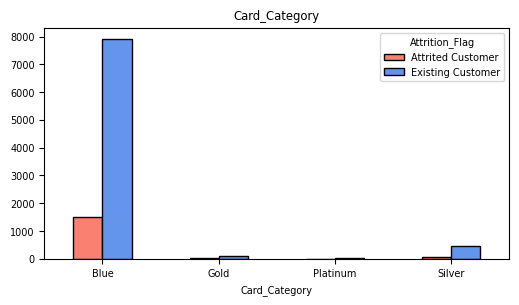

In [9]:
# Histograms of the categorical variables labeled by attrition
plt.figure(figsize=(10,6))
for i, var in enumerate(cat_var):
  if var!="Attrition Flag":
    pd.crosstab(df[var], df.Attrition_Flag).plot(kind="bar", figsize=(6,3),
                                    color=["salmon", "cornflowerblue"], edgecolor="black")
    labels=["Attrited Customer","Existing Customer"]
    plt.xticks(rotation ='horizontal');
    plt.title(var)

These histograms doesn't show any significant differencies between the two target groups. Let's check the correlation matrix.

In [10]:
df["target"]=(df.Attrition_Flag=="Attrited Customer").astype(int)

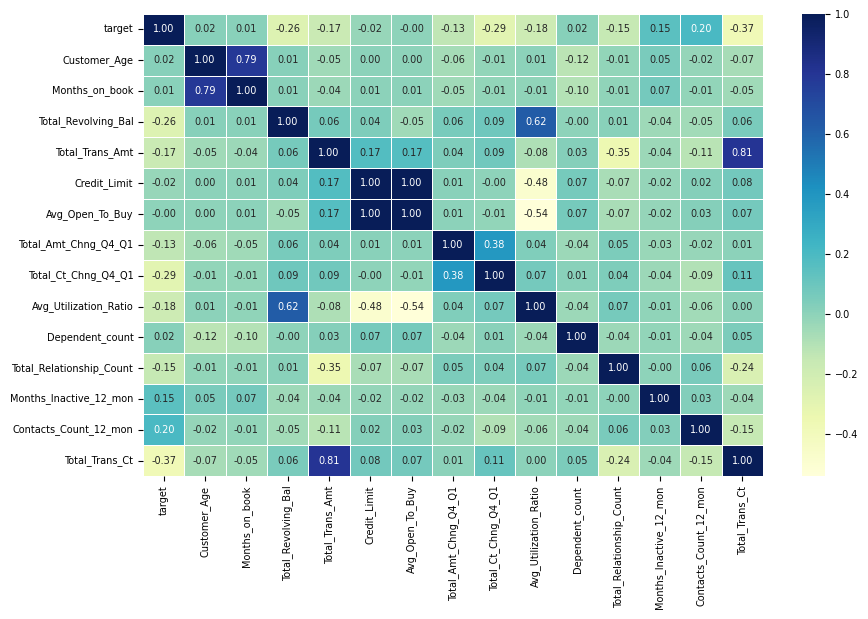

In [11]:
import seaborn as sns
corr_matrix = df[["target"]+num_var].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,
            annot=True,
            linewidths=0.5,
            fmt= ".2f",
            cmap="YlGnBu");

The correlation between the target and the Total Transaction Count and correlation between the target and the Total_Ct_Chng_Q4_Q1 have maximal absolute values among other variables. We plot these values with the target labels on a scatter plot, then we'll see the attritied customers are on the bottom left part of the plot because both correlations are negative.

We can also see strong multi-collinearility between the continous variables there we will need to perform some kind of dimension-reduction before building machine learning models.

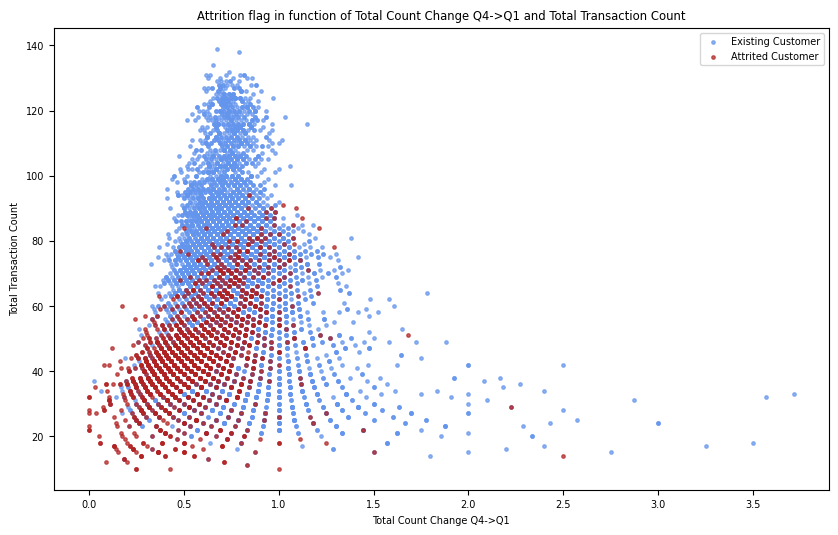

In [12]:
# Create another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.Total_Ct_Chng_Q4_Q1[df.target==0], df.Total_Trans_Ct[df.target==0], c="cornflowerblue", alpha=0.7, s=6);
#Scatter with negative examples
plt.scatter(df.Total_Ct_Chng_Q4_Q1[df.target==1], df.Total_Trans_Ct[df.target==1], c="firebrick", alpha=0.7, s=6);

# Add some helpful into
plt.title("Attrition flag in function of Total Count Change Q4->Q1 and Total Transaction Count")
plt.xlabel("Total Count Change Q4->Q1")
plt.ylabel("Total Transaction Count")
plt.legend(["Existing Customer", "Attrited Customer"]);

### Data preparation

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op


Since there are no missing values, we just need to convert string variables to categories.

In [16]:
df.isna().sum().sum()

0

In [17]:
# Turn categorical variables into numbers and fill missing
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Turn categories into numbers and add
        df[label] = pd.Categorical(content).codes

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int8   
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  int8   
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  int8   
 5   Marital_Status            10127 non-null  int8   
 6   Income_Category           10127 non-null  int8   
 7   Card_Category             10127 non-null  int8   
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

We are ready with the bare minimum to predict attrition using machine learning models. However, we go one step further because we can see the effect of multi-collinearity. To reduce this effect, we perfom a PCA on the numerical values.

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_cont=scaler.fit_transform(df[cont_var])
scaled_cont.shape

(10127, 9)

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=9)
pca.fit(scaled_cont)


PCA(n_components=9)

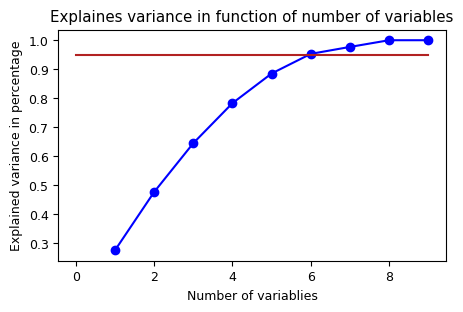

In [24]:
fig, ax = plt.subplots(figsize=(5,3))
ax.plot(range(1,10), np.cumsum(pca.explained_variance_ratio_), 'bo-')
ax.plot(range(0,10), 10*[0.95], color="firebrick")
plt.rcParams.update({'font.size': 9})
ax.set_xlabel("Number of variablies")
ax.set_ylabel("Explained variance in percentage")
plt.title("Explaines variance in function of number of variables");

We choose the first 6 variables because this way the explained variance is above 95% while we reduced the number of variables by 3.

In [25]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
df_cont=pca.fit_transform(scaled_cont)
pca.n_components_

6

In [26]:
df_cont=pd.DataFrame(df_cont, columns=["PCA_"+str(i) for i in range(1,7)])
df_cont

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6
0,0.697008,0.567835,2.631635,3.598896,-1.423953,1.030640
1,-0.333286,0.920795,7.521382,8.427514,-1.475020,6.559026
2,-0.320561,1.511574,5.869000,8.950776,-1.691403,-0.861179
3,-2.458051,1.919472,5.487037,3.546994,-1.633045,2.840362
4,-0.186269,3.507798,4.919873,8.044717,-1.865995,1.099128
...,...,...,...,...,...,...
10122,-0.691855,-0.299682,1.548506,-0.541065,3.161827,0.197052
10123,-1.123410,1.591325,0.777818,-0.978106,1.046049,-0.351926
10124,0.702416,0.381844,-0.402462,1.400831,1.940170,-0.012166
10125,0.652810,1.289265,-1.562592,0.488577,1.576069,0.682690


And now we concat our datasets to create our final database for machine learning.

In [27]:
df[cat_var].shape

(10127, 6)

In [28]:
df_final=pd.concat([df_cont, df[disc_var], df[cat_var]], axis=1)
df_final.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Trans_Ct,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,0.697008,0.567835,2.631635,3.598896,-1.423953,1.030640,3,5,1,3,42,1,1,3,1,2,0
1,-0.333286,0.920795,7.521382,8.427514,-1.475020,6.559026,5,6,1,2,33,1,0,2,2,4,0
2,-0.320561,1.511574,5.869000,8.950776,-1.691403,-0.861179,3,4,1,0,20,1,1,2,1,3,0
3,-2.458051,1.919472,5.487037,3.546994,-1.633045,2.840362,4,3,4,1,20,1,0,3,3,4,0
4,-0.186269,3.507798,4.919873,8.044717,-1.865995,1.099128,3,5,1,0,28,1,1,5,1,2,0


### Save preproccessed dataset


In [ ]:
# Export current dataframe
df_final.to_csv("/content/drive/MyDrive/credit_card_customers/df.csv",
              index=False)

## 5. Modelling

In [29]:
# Import preprocessed data
df = pd.read_csv("/content/drive/MyDrive/credit_card_customers/df.csv",
                     low_memory=False)

### Splitting data into train/validation sets


In [30]:
df.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Trans_Ct,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,0.697008,0.567835,2.631635,3.598896,-1.423953,1.030640,3,5,1,3,42,1,1,3,1,2,0
1,-0.333286,0.920795,7.521382,8.427514,-1.475020,6.559026,5,6,1,2,33,1,0,2,2,4,0
2,-0.320561,1.511574,5.869000,8.950776,-1.691403,-0.861179,3,4,1,0,20,1,1,2,1,3,0
3,-2.458051,1.919472,5.487037,3.546994,-1.633045,2.840362,4,3,4,1,20,1,0,3,3,4,0
4,-0.186269,3.507798,4.919873,8.044717,-1.865995,1.099128,3,5,1,0,28,1,1,5,1,2,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PCA_1                     10127 non-null  float64
 1   PCA_2                     10127 non-null  float64
 2   PCA_3                     10127 non-null  float64
 3   PCA_4                     10127 non-null  float64
 4   PCA_5                     10127 non-null  float64
 5   PCA_6                     10127 non-null  float64
 6   Dependent_count           10127 non-null  int64  
 7   Total_Relationship_Count  10127 non-null  int64  
 8   Months_Inactive_12_mon    10127 non-null  int64  
 9   Contacts_Count_12_mon     10127 non-null  int64  
 10  Total_Trans_Ct            10127 non-null  int64  
 11  Attrition_Flag            10127 non-null  int64  
 12  Gender                    10127 non-null  int64  
 13  Education_Level           10127 non-null  int64  
 14  Marita

In [32]:
# Everything except Attrition_Flag variable
X = df.drop("Attrition_Flag", axis=1)

# Attrition_Flag variable
y = df.Attrition_Flag

In [33]:
X.shape, y.shape

((10127, 16), (10127,))

In [34]:
# Random seed for reproducibility
np.random.seed(12)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables
                                                    y, # dependent variable
                                                    test_size = 0.2) # percentage of data to use for test set

### Model selection
Now we've got our data prepared, we can start to fit models. We'll be using the following and comparing their results.
* Logistic Regression - LogisticRegression()
* K-Nearest Neighbors - KNeighboursClassifier()
* RandomForest - RandomForestClassifier()
* Linear SVC -  LinearSVC()
* SVC - SVC()
* XGBoost - XGBoostClassifier()

In [ ]:
# Put models in a dictionary
models = {"LinearSVC": LinearSVC(),
          "KNN": KNeighborsClassifier(),
          "SVC": SVC(),
          "LogisticRegression": LogisticRegression(),
          "RandomForestClassifier": RandomForestClassifier(),
          "XGBoost": xgb.XGBClassifier()}
# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [ ]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LinearSVC': 0.8904244817374136,
 'KNN': 0.9032576505429417,
 'SVC': 0.8958538993089832,
 'LogisticRegression': 0.8978282329713722,
 'RandomForestClassifier': 0.9432379072063178,
 'XGBoost': 0.9565646594274433}

The RandomForestClassifier is very close to our goal of 95% accuracy, and the XGBoost Classifier exceeds it.

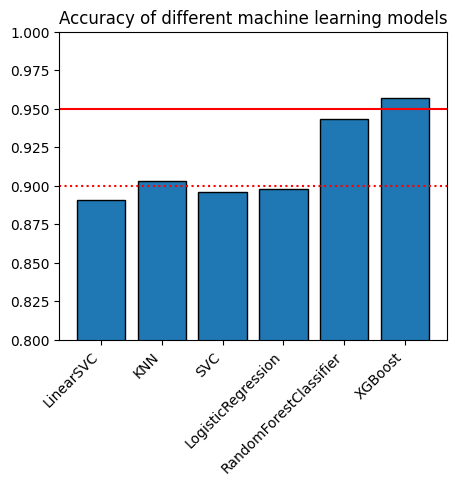

In [ ]:
fig, ax = plt.subplots(figsize=(5,4))
plt.bar(range(len(model_scores)), list(model_scores.values()), tick_label=list(model_scores.keys()), edgecolor="black")
plt.axhline(y=0.95, color='red')
plt.axhline(y=0.90, color='red', linestyle="dotted")
plt.ylim(0.8,1)
plt.xticks(rotation=45, ha='right')
plt.title("Accuracy of different machine learning models")
plt.show();

### Tune KNeighborsClassifier (K-Nearest Neighbors or KNN) by hand

In [ ]:
# Create a list of train scores
train_scores = []

# Create a list of test scores
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21) # 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value

    # Fit the algorithm
    knn.fit(X_train, y_train)

    # Update the training scores
    train_scores.append(knn.score(X_train, y_train))

    # Update the test scores
    test_scores.append(knn.score(X_test, y_test))



Let's plot the parameter tuning of KNN.



Maximum KNN score on the test data: 91.26%


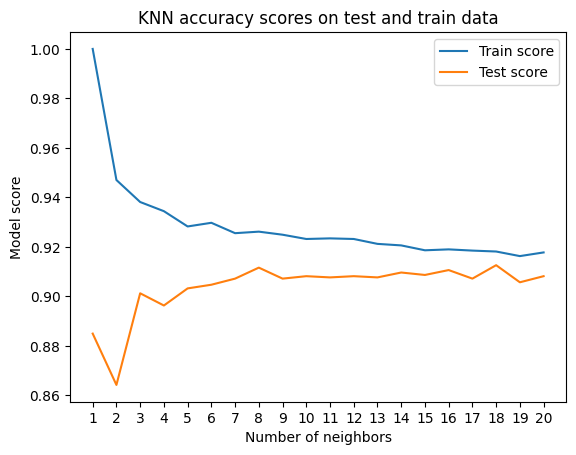

In [ ]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
plt.title("KNN accuracy scores on test and train data")

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

We managed to improve KNN's score slightly but it's still under 95% therefore we drop this model.

### HyperParameter Tuning Using RandomizedSearch CV

In [ ]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-5, 5, 100),
                "solver": ["liblinear", "newton-cholesky"],
                "max_iter":[200]
                }

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": [50,100, 200, 500, 700, 1000],
           "max_depth": [None, 3, 5, 10, 20],
           "min_samples_split": [2,5,10],
           "min_samples_leaf": [1,2,4]}



In [ ]:
# Tune LogisticRegression
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=100,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100,
                   param_distributions={'C': array([1.00000000e-05, 1.26185688e-05, 1.59228279e-05, 2.00923300e-05,
       2.53536449e-05, 3.19926714e-05, 4.03701726e-05, 5.09413801e-05,
       6.42807312e-05, 8.11130831e-05, 1.02353102e-04, 1.29154967e-04,
       1.62975083e-04, 2.05651231e-04, 2.59502421e-04, 3.27454916e-04,
       4.13201240e-...
       1.20450354e+03, 1.51991108e+03, 1.91791026e+03, 2.42012826e+03,
       3.05385551e+03, 3.85352859e+03, 4.86260158e+03, 6.13590727e+03,
       7.74263683e+03, 9.77009957e+03, 1.23284674e+04, 1.55567614e+04,
       1.96304065e+04, 2.47707636e+04, 3.12571585e+04, 3.94420606e+04,
       4.97702356e+04, 6.28029144e+04, 7.92482898e+04, 1.00000000e+05]),
                                        'max_iter': [200],
                                        'solver': ['liblinear',
                                                   'newton-cholesky']},
                   verbose=True)

In [ ]:
rs_log_reg.best_params_

{'solver': 'newton-cholesky', 'max_iter': 200, 'C': 0.04328761281083057}

We improved our Logistic Regression model but we are still under 95% accuracy.

In [ ]:
rs_log_reg.score(X_test, y_test)

0.9012833168805529

Now, we have 2 models left:
* RandomForestClassifier
* XGBoost

First, we try to improve the Random Forest Classifier model to get an accuracy score of 95% or more with parameter tuning and then we will work with the XGBoost classifier.

**Beware, the next cell might take a long time to run.**




In [ ]:
# Parameter tuning of RandomForestClassifier
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 500, 700,
                                                         1000]},
                   verbose=True)

In [ ]:
rs_rf.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_depth': 20}

We improved the accuracy of the RandomForestClassifier but it is still under 95%. We keep it for more evaulation together with the best base model, the XGBoostClassifier.

In [ ]:
rs_rf.score(X_test, y_test)

0.9437314906219151

But before moving forward to the evaluation, we perform parameter tuning on XGBoostClassifier as well.

In [ ]:
#Creating an XGBoost classifier
model = xgb.XGBClassifier()

#Training the model on the training data
model.fit(X_train, y_train)

#Making predictions on the test set
predictions = model.predict(X_test)

#Calculating accuracy
accuracy = accuracy_score(y_test, predictions)

print("Accuracy:", accuracy)

Accuracy: 0.9565646594274433


In [ ]:
xgb_grid = {
    'n_estimators': [100, 500, 900, 1100, 1500],
    'max_depth': [2, 3, 5, 10, 15],
    'learning_rate': [0.05, 0.1, 0.15, 0.20],
    'min_child_weight': [1, 2, 3, 4]
    }

In [ ]:
# Parameter tuning of XGBoostClassifier
np.random.seed(42)

# Setup random hyperparameter search for XGBoostClassifier
rs_xgb = RandomizedSearchCV(xgb.XGBClassifier(),
                           param_distributions=xgb_grid,
                           cv=5,
                           n_iter=50,
                           verbose=True)

# Fit random hyperparameter search model for XGBoostClassifier
rs_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=50,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   verbose=True)

In [ ]:
rs_xgb.best_params_

{'n_estimators': 1100,
 'min_child_weight': 2,
 'max_depth': 5,
 'learning_rate': 0.1}

In [ ]:
y_preds = rs_xgb.predict(X_test)
accuracy_score(y_test, y_preds)

0.9605133267522211

We managed to reach 96% accuracy. Now we are done with modelling and it is time to move forward to evaluation. We will investigate our two best performing models:
* RandomForestClassifier
* XGBoostClassifier

## 6. Evaluation

Here, our goal is to evalute our tuned machine learning classifier, beyond accuracy. We have two different model around 95% accuracy. Let's take a closer look on how well they identify churned customers:
* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score


In [35]:
# First we need to reload our trained models

# Fitting RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=1000, min_samples_split=5, min_samples_leaf=1,max_depth=20)
rfc.fit(X_train, y_train)

#Fitting XGBoostClassifier
xgbc=xgb.XGBClassifier(n_estimators=1100, min_child_weight=2, max_depth=5,learning_rate=0.1)
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# We need to make predictions.
y_preds_rf=rfc.predict(X_test)
y_preds_xgb=xgbc.predict(X_test)

Both ROC curve are excellent.

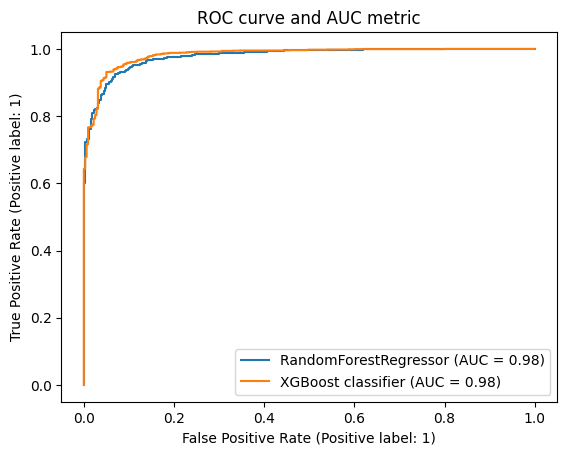

In [ ]:
# Plot ROC curve and calculate and calculate AUC metric
fig, ax= plt.subplots()
RocCurveDisplay.from_estimator(rfc, X_test, y_test, ax=ax, name="RandomForestRegressor")
RocCurveDisplay.from_estimator(xgbc, X_test, y_test, ax=ax, name="XGBoost classifier")
plt.title("ROC curve and AUC metric")
plt.show();

If we take a look at the confusion matrices: we can see the difference between the models: The XGBoostClassifier is able to identify more churned customer which absolutely aligns with our goal.

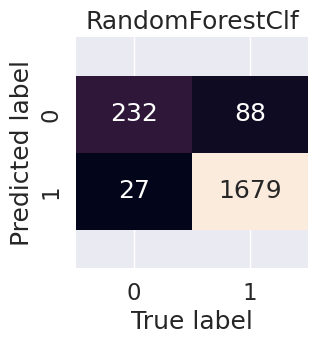

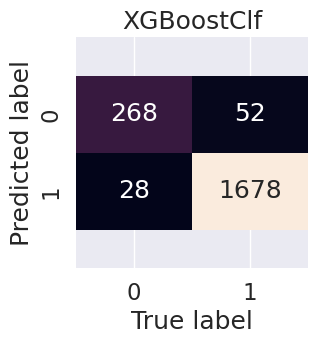

In [ ]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds, name):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False,
                     fmt='g')
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.title(name)

plot_conf_mat(y_test, y_preds_rf, "RandomForestClf")
plot_conf_mat(y_test, y_preds_xgb,"XGBoostClf")

In [ ]:
print(classification_report(y_test, y_preds_rf))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80       320
           1       0.95      0.98      0.97      1706

    accuracy                           0.94      2026
   macro avg       0.92      0.85      0.88      2026
weighted avg       0.94      0.94      0.94      2026



In [ ]:
print(classification_report(y_test, y_preds_xgb))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87       320
           1       0.97      0.98      0.98      1706

    accuracy                           0.96      2026
   macro avg       0.94      0.91      0.92      2026
weighted avg       0.96      0.96      0.96      2026



We calculate evaluation metrics using cross-validation.

In [ ]:
# Visualize cross-validated metrics
def visualize_cross_val(clf, X, y, name):
  cv_acc = cross_val_score(clf,
                          X,
                          y,
                          cv=5,
                          scoring="accuracy")
  cv_acc=cv_acc.mean()


  # Cross-validated precision
  cv_precision = cross_val_score(clf,
                          X,
                          y,
                          cv=5,
                          scoring="precision")
  cv_precision=np.mean(cv_precision)
  # Cross-validated recall
  cv_recall = cross_val_score(clf,
                          X,
                          y,
                          cv=5,
                          scoring="recall")
  cv_recall = np.mean(cv_recall)
  # Cross-validated f1-score
  cv_f1 = cross_val_score(clf,
                          X,
                          y,
                          cv=5,
                          scoring="f1")
  cv_f1 = np.mean(cv_f1)
  cv_metrics = {"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1}
  fig, ax = plt.subplots(figsize=(6,5))
  plt.bar(range(len(cv_metrics)), list(cv_metrics.values()), tick_label=list(cv_metrics.keys()), edgecolor="black")
  plt.axhline(y=0.95, color='red')
  plt.axhline(y=0.90, color='red', linestyle="dotted")
  plt.ylim(0.8,1)
  plt.xticks(rotation=45, ha='right')
  plt.title(f"Cross-validated classification metrics\n {name}")
  plt.show();


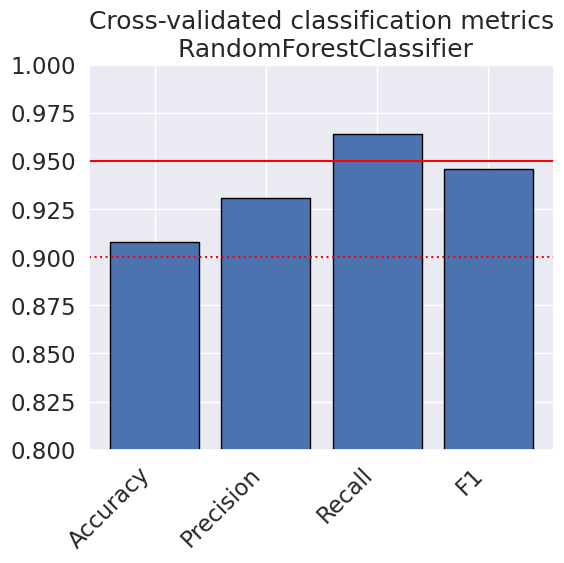

In [ ]:
visualize_cross_val(rfc, X, y, "RandomForestClassifier")

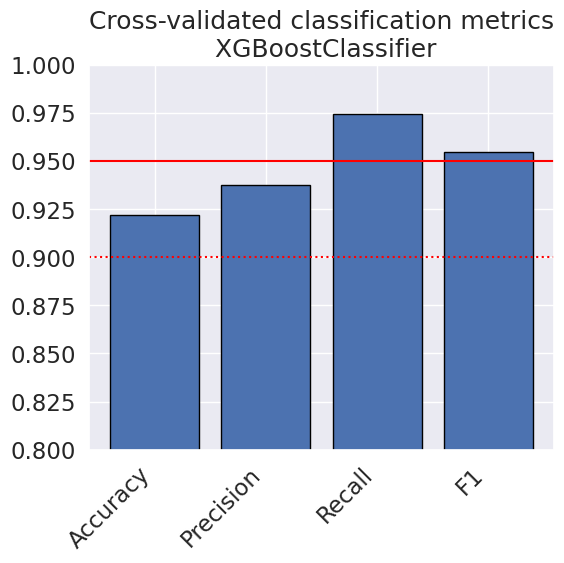

In [ ]:
visualize_cross_val(xgbc, X, y, "XGBoostClassifier")

## 7. Feature importance

Our chosen model is the XGBoostClassifier because it has slightly better scores than the RandomForestClassifier, and most importantly, the difference comes from detecting churned customers more accurately.

In [41]:
importances = xgbc.feature_importances_
pd.Series(importances, index=X.columns).sort_values()

Education_Level             0.017613
Income_Category             0.018980
Card_Category               0.023913
Dependent_count             0.030866
PCA_2                       0.032815
PCA_6                       0.033405
PCA_4                       0.036789
Marital_Status              0.037265
PCA_1                       0.046636
Gender                      0.061170
Months_Inactive_12_mon      0.065614
Contacts_Count_12_mon       0.069327
PCA_3                       0.082902
PCA_5                       0.084895
Total_Relationship_Count    0.162162
Total_Trans_Ct              0.195647
dtype: float32

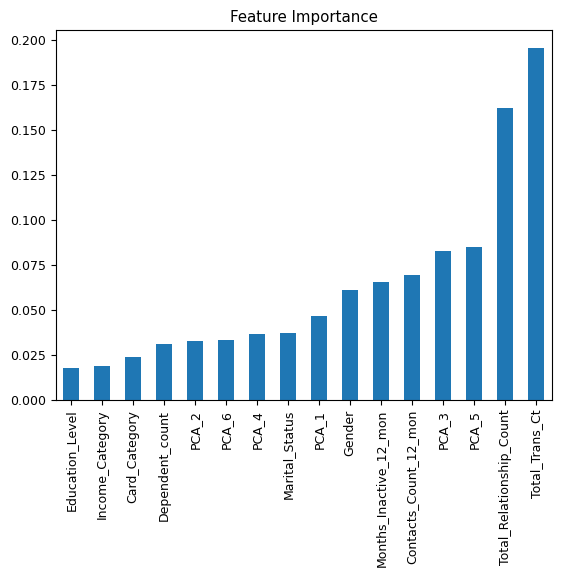

In [43]:
# Visualize feature importance
pd.Series(importances, index=X.columns).sort_values().T.plot.bar(title="Feature Importance", legend=False);

Here we can see that the most important features in our model ar the Total Transaction Count and the Total Relationship Count. In the Data Exploration section we've already seen that the lower Transaction Count or the Total Relationship Count, the higher the chance of a customer churns. Therefore we need to give extra attentions of the customers with these parameters.